In [118]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
import numpy as np

In [109]:
df = pd.read_csv('datasets/Total_consumption_for_all_sectors_monthly.csv', parse_dates=['Month'], date_format='%Y-%m')
df.dropna(inplace=True)
df.head()
df.set_index("Month", inplace=True)
df.index = pd.to_datetime(df.index)
series = pd.Series(df['United States : coal thousand tons'])
series = series[::-1]

C:\Users\mwdzi\AppData\Local\Temp\ipykernel_3016\587574953.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)


Month
2000-12-01    90950.508
2001-01-01    77545.158
2001-02-01    80268.061
2001-03-01    72530.370
2001-04-01    78810.185
Name: United States : coal thousand tons, dtype: float64

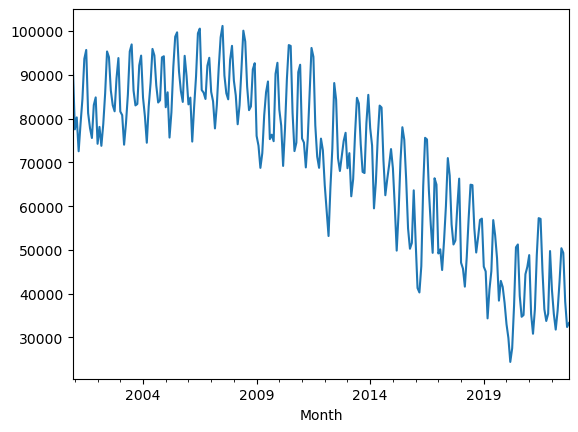

In [110]:
series.plot()
series.head()

In [111]:
train, test = series[:int(len(series) * 0.8)], series[int(len(series) * 0.8):]

C:\Users\mwdzi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mwdzi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


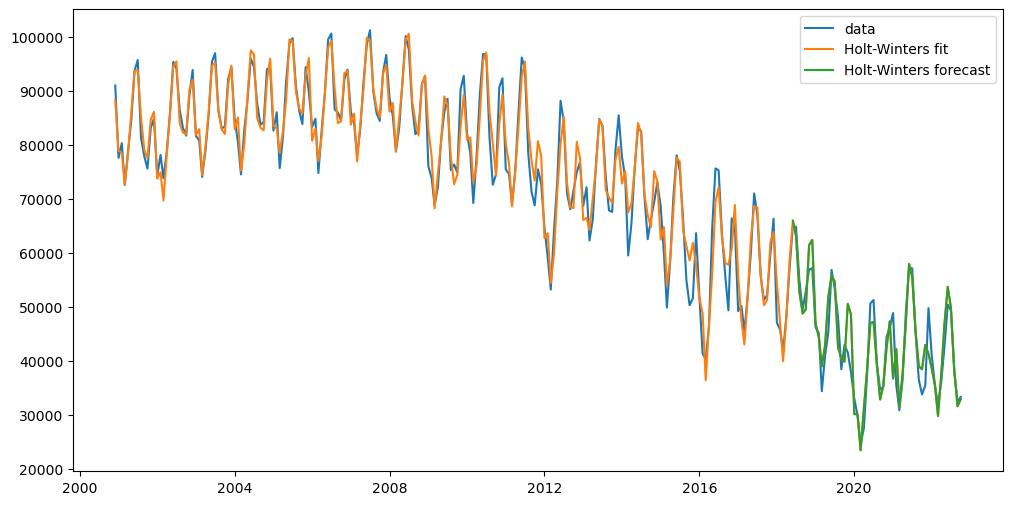

In [112]:
hw_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12, trend='add')
hw_model_fit = model.fit()
hw_predictions = hw_model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

plt.figure(figsize=(12, 6))
plt.plot(series.index, series, label='data')
plt.plot(series.index, model_fit.fittedvalues, label='Holt-Winters fit')
plt.plot(test.index, hw_predictions, label='Holt-Winters forecast')

plt.legend()
plt.show()

In [113]:
print(model_fit.summary())

                              ExponentialSmoothing Model Results                              
Dep. Variable:     United States : coal thousand tons   No. Observations:                  263
Model:                           ExponentialSmoothing   SSE                     2918452686.940
Optimized:                                       True   AIC                           4298.429
Trend:                                       Additive   BIC                           4355.584
Seasonal:                                    Additive   AICC                          4301.233
Seasonal Periods:                                  12   Date:                 Fri, 26 Apr 2024
Box-Cox:                                        False   Time:                         08:56:45
Box-Cox Coeff.:                                  None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------

In [114]:
sarima_model = auto_arima(train, seasonal=True, m=12, trace=True)
sarima_model_fit = sarima_model.fit(train)
sarima_predictions = sarima_model_fit.predict(n_periods=len(test))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=4168.477, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4345.686, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4227.745, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4276.757, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4343.777, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=4183.414, Time=0.62 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=4183.744, Time=0.79 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=1.53 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=4177.226, Time=1.25 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=4173.469, Time=1.42 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=i

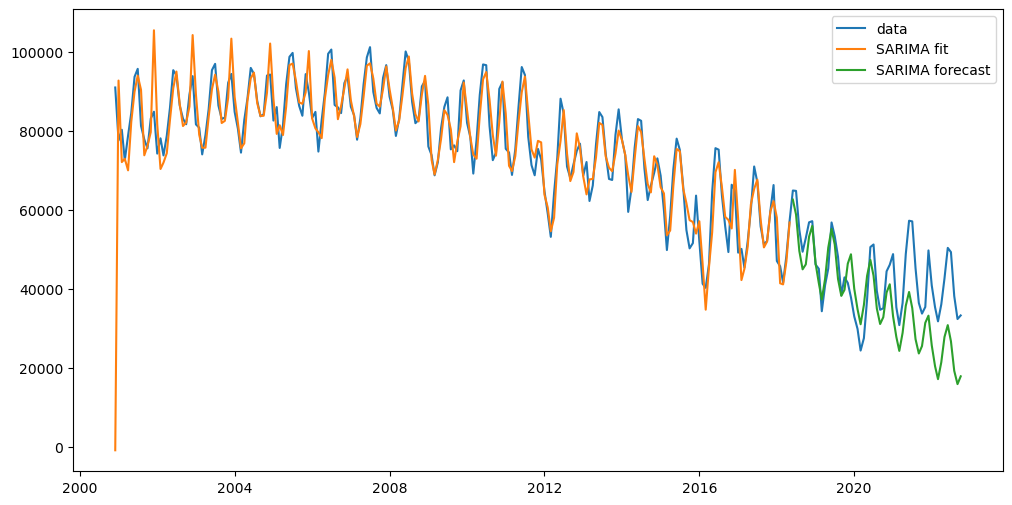

In [115]:
plt.figure(figsize=(12, 6))
plt.plot(series.index, series, label='data')
fitted_values = sarima_model_fit.predict_in_sample()
plt.plot(series.index[:len(fitted_values)], fitted_values, label='SARIMA fit')
plt.plot(test.index, sarima_predictions, label='SARIMA forecast')
plt.legend()
plt.show()

In [121]:
hw_mean_absolute_percentage_error = mean_absolute_percentage_error(test, hw_predictions)*100
sarima_mean_absolute_percentage_error = mean_absolute_percentage_error(test, sarima_predictions)*100

print(f'Holt-Winters MAPE: {hw_mean_absolute_percentage_error}')
print(f'SARIMA MAPE: {sarima_mean_absolute_percentage_error}')

Holt-Winters MAPE: 6.796067973797467
SARIMA MAPE: 20.82130356391464
